# Napari: Multi-dimensional Image Viewer in Python

The Djavad Mowafaghian Centre for Brain Health is currently part of an Open Science Initiative to establish local support for, and a framework leading to, the transformation of the center to an Open Science Institute modelled after the pioneering example of the McGill Neurological Institute (MNI). Developing and adapting open science principles to suit the unique needs of our Centre necessitates collecting information on attitudes, behaviours and perceived norms, as they pertain to open science, from everyone in our research community - faculty, staff and students. 

<div>
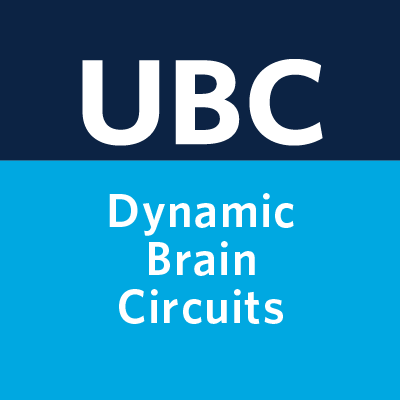
</div>

Napari is an open-source Python library for visualizing multi-dimensional datasets. This allows for seamless integration with the commonly used scientific Python libraries (scikit-learn, scikit-image, Numpy, etc). The following script goes over the basics of using and interacting with the Napari Viewer and the use of three layer types: image, label, and point. The Napari Viewer is the GUI that allows users to interact and visualize their data. It is recommended to use jupyter notebook as the local host to execute the following script. For other ways of launching the Napari Viewer [see here](https://napari.org/tutorials/fundamentals/viewer.html) .

<div>
<img src="img/napari_logo.png" width="300" height="300"/>
</div>


Note: Credits for writing this script go to Peter Hogg.

The following line of code downloads Napari as a python package:

For other possible methods of installing napari refer to this page: https://napari.org/tutorials/fundamentals/installation.html

In [ ]:
!conda install --yes -c conda-forge napari 

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

import napari
import numpy as np

from skimage.data import cells3d, cat, human_mitosis
from skimage.measure import label

from scipy.ndimage import center_of_mass


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Napari uses QT to manage its user interface. To use Napari we need to have our Jupyter Notebook 
launch a QT event loop. That can be launched using this command:

In [ ]:
%gui qt

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

There are alternative backends for Napari for more information see the documentation on the installation page [here](https://napari.org/tutorials/fundamentals/installation.html) .
The current implentation of Napari requires it to be run locally. Visualization of remote data is currently being discussed by the development team see [here](https://github.com/napari/napari/pull/851) and [here](https://github.com/napari/napari/issues/1875)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Next we will load some test data from skimage

In [ ]:
# Load Data from skimage
# 3D Volume of labeled nuclei and cell membranes
# I've split the cell data into two arrays, one for each channel
cell_membrane = cells3d()[:,0,:,:]
nuclei = cells3d()[:,1,:,:]

# A picture of a Cat
cat_photo = cat()

# Some cells
cells = human_mitosis()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We can launch an instance of the Napari Viewer with the function **Viewer()** in the Napari library.

In [ ]:
cat_viewer = napari.Viewer()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We've now launched an instance of the Napari viewer saved to the variable cat_viewer. We can now interact with the viewer programmatically. Let's add a layer to the viewer. This can be done with the method **add_image**.

In [ ]:
# This line of code will add a new layer to our viewer containing the cat photo
cat_viewer.add_image(cat_photo)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Napari guessed based off of the dimensions of the array that the array was an RGB image. In some cases this behavior is undesirable. In these cases, we can force Napari to treat the image as a multidimensional array and not a RGB image.  

In [ ]:
# Layers are stored in a list inside the Viewer object, they can be removed programmatically using pop. 
cat_viewer.layers.pop(0)

print('The shape of the cat image is:', cat_photo.shape)

cat_viewer.add_image(cat_photo, name="RGB False",rgb=False)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

There are several important parameters for Image Layers
- name: string used as the name of the layer
- rgb: boolean (True/False)
- scale: array-like for relative scale between dimensions
- colormap: keyword to select the colormap to use while rendering
- blending: keyword for how layers are combined during rendering

Let's explore these basic parameters using a multichannel 3D image stack

In [ ]:
cell_viewer_3D = napari.Viewer()

# Here we will add two image layers
cell_viewer_3D.add_image(cell_membrane)
cell_viewer_3D.add_image(nuclei)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Let's reopen this viewer with non-default values for a few of these parameters

In [ ]:
cell_viewer_3D = napari.Viewer()

cell_viewer_3D.add_image(cell_membrane, name='Membrane', blending='additive', colormap='magenta', gamma=.5)
cell_viewer_3D.add_image(nuclei, name='Nuclei', blending='additive', colormap='cyan')

The Napari Viewer is designed to handle multiple dimensions.
Let's add time into the mix!

In [ ]:
neuron_viewer_4D = napari.Viewer()


# Look at the new parameter scale that is being used in the the image layer
neuron_viewer_4D.add_image(np.load("neuron_timelapse.npy"), scale=(1, 4,1,1),colormap = 'cyan')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Next let's look at two additional layer types labels and points 

In [ ]:
# Create a new viewer and load an image of cells
cell_viewer = napari.Viewer()
cell_viewer.add_image(cells)



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Labels are arrays of integers. Napari will give each non-zero integer a random color. Label arrays can be 2D or 3D. For more information see the label layer documentation [here](https://napari.org/tutorials/fundamentals/labels.html). Let's quickly generate labels for the cells in this image and add these labels to the Napari Viewer.

In [ ]:
# Make a copy of the cell image to work with
cell_labels = cells.copy()

# Quick way of making a binary image
cell_labels[cell_labels<=cells.mean()*1.9]= 0
cell_labels[cell_labels> 0]= 1

# Use a function from skimage to generate labels
cell_labels = label(cell_labels)
print(np.max(cell_labels))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Similarly, to the **add_image** method, the **add_labels** method will create a new layer in the viewer displaying the array provided as an input. 

In [ ]:
cell_viewer.add_labels(cell_labels)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Another basic layer type is the point layer. Napari will render points if coordinates that match the dimensions of the current layers are provide. As this is a 2D image, we will need to generate an array containing X, Y coordinates. Let’s calculate the center of mass for each label and plot this on top of the image.  For documentation on the center of mass function see this [page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.center_of_mass.html)

In [ ]:

CoM_cells = center_of_mass(cells, labels=cell_labels, index= np.unique(cell_labels)[1:])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

To add these points to the viewer we can use the **add_points** method. This method has several useful paremeters such as:
    - face_color: color of the face of the symbol
    - edge_color: edge color of the symbol
    - size:diameter of the symbol
    - symbol: what symbol will be plotted (x, square, circle, etc)
   
 For further information see this [page](https://napari.org/tutorials/fundamentals/points.html)

In [ ]:
cell_viewer.add_points(CoM_cells, size=5, edge_color='red')    

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The Napari viewer can update the arrays that are currently being displaying. Let's change the labels in the label layers and recalculate  the center of mass of each label.

In [ ]:
CoM_cells = center_of_mass(cells, labels=cell_labels, index= np.unique(cell_labels)[1:])
cell_viewer.add_points(CoM_cells, name="Updated Points", size=3, edge_color='blue', face_color='blue', symbol='square')  

In [ ]:
def CellInt2Color(image, labels):
    ####################################
    """
    Function that takes an image array and label array
    and maps mean pixel intensities to a colormap

    returns a list of RGBA values
    """
    ####################################
    
    # Create a linear colormap
    
    # First find the dimmest and brightest cell
    dim = 0
    bright = 0
    for roi in np.unique(labels)[1:]:
        if roi ==1:
            dim = np.mean(image[labels==roi])
            bright = np.mean(image[labels==roi])
        else:
            if np.mean(image[labels==roi]) < dim:
                dim = np.mean(image[labels==roi])
            if np.mean(image[labels==roi]) > bright:
                bright = np.mean(image[labels==roi])
    
    
    norm = colors.Normalize(vmin=dim, vmax=bright)
    cmap = cm.coolwarm
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    
    rgb_vals = []
    
    for roi in np.unique(labels)[1:]:
        rgb_vals.append(m.to_rgba(np.mean(image[labels==roi])))
    return rgb_vals
point_colors = CellInt2Color(cells, cell_labels)


In [ ]:

cell_viewer.add_points(CoM_cells, name="Cell Mean Intensities", size=5, face_color=point_colors)  

In [ ]:
# Remember Napari is designed to handle a high number of dimensions
# Let's create random points in 4D
random_points = []
for i in range(50):
    random_points.append(np.append(np.random.randint(low=0,  high=10), np.random.randint(low=0,  high=100, size=3)))
    
# Create a new viewer to plot 4D points
fourD_viewer = napari.Viewer()
fourD_viewer.add_points(random_points, name="Random Stars", size=5, face_color='yellow', symbol='star' )  

BONUS LAYER TYPE: Track layers allow for the tracking of points
over dimensions 

In [ ]:
def genRandomTrack(points):
    ####################################
    """
    Function generates random tracks for a given number
    of points
    
    Returns (50,5) array
    """
    ####################################
    tracks = np.empty((0,5))
    for j in range(points):
        track = np.zeros((50,5))
        position = np.random.randint(low=0,  high=100, size=3)
        for i in range(50):
            track[i, :] = [j, i, position[0],  position[1],  position[2]]  
            position += np.random.randint(low=-3,  high=3, size=3)
        tracks = np.append(tracks, track, axis=0)
    return tracks

In [ ]:
tracks = genRandomTrack(5)

# Create a new viewer and load an image of cells
tracking_example = napari.Viewer()
tracking_example.add_tracks(tracks)